In [15]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from deepctr.models import xDeepFM
from deepctr.inputs import  SparseFeat, DenseFeat,get_feature_names
import pickle
import json

import glob
from IPython.display import display, HTML
from tqdm import tqdm_notebook as tqdm
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)

import papermill as pm
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from reco_utils.dataset import movielens

from reco_utils.dataset.wikidata import (search_wikidata, 
                                         find_wikidata_id, 
                                         query_entity_links, 
                                         read_linked_entities,
                                         query_entity_description)



#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns
#matplotlib.use('Agg')

import warnings
warnings.filterwarnings("ignore")



In [5]:
os.chdir(r'N:\ALGORITHMIC MARKETING\Assignment4/data/Customer2Vec')

## xDeepFM 

In [6]:
df_Snacks_XDeepFM = pd.read_csv('Snacks_CTR_Data.csv')
df_Snacks_XDeepFM = df_Snacks_XDeepFM.drop(columns=['Customer_Id', 'Campaign_id','Unnamed: 0'])
df_Snacks_XDeepFM.head()

,label,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,Customer_Name,Campaign_name
0,0,NaN,3,260.0,NaN,17668.0,NaN,NaN,33.0,NaN,NaN,NaN,0.0,NaN,05db9164,08d6d899,9143c832,f56b7dd5,25c83c98,7e0ccccf,df5c2d18,0b153874,a73ee510,8f48ce11,a7b606c4,ae1bb660,eae197fd,b28479f6,bfef54b3,bad5ee18,e5ba7672,87c6f83c,NaN,NaN,0429f84b,NaN,3a171ecb,c0d61a5c,NaN,NaN,Rachel Salas,Snakku
1,0,NaN,-1,19.0,35.0,30251.0,247.0,1.0,35.0,160.0,NaN,1.0,NaN,35.0,68fd1e64,04e09220,95e13fd4,a1e6a194,25c83c98,fe6b92e5,f819e175,062b5529,a73ee510,ab9456b4,6153cf57,8882c6cd,769a1844,b28479f6,69f825dd,23056e4f,d4bb7bd8,6fc84bfb,NaN,NaN,5155d8a3,NaN,be7c41b4,ded4aac9,NaN,NaN,Benjamin Collins,Love with food
2,0,0.0,0,2.0,12.0,2013.0,164.0,6.0,35.0,523.0,0.0,3.0,NaN,18.0,05db9164,38a947a1,3f55fb72,5de245c7,30903e74,7e0ccccf,b72ec13d,1f89b562,a73ee510,acce978c,3547565f,a5b0521a,12880350,b28479f6,c12fc269,95a8919c,e5ba7672,675c9258,NaN,NaN,2e01979f,NaN,bcdee96c,6d5d1302,NaN,NaN,Rachel Salas,Candy Club
3,0,NaN,13,1.0,4.0,16836.0,200.0,5.0,4.0,29.0,NaN,2.0,NaN,4.0,05db9164,8084ee93,02cf9876,c18be181,25c83c98,NaN,e14874c9,0b153874,7cc72ec2,2462946f,636405ac,8fe001f4,31b42deb,07d13a8f,422c8577,36103458,e5ba7672,52e44668,NaN,NaN,e587c466,NaN,32c7478e,3b183c5c,NaN,NaN,Rachel Salas,Nature Box
4,0,0.0,0,104.0,27.0,1990.0,142.0,4.0,32.0,37.0,0.0,1.0,NaN,27.0,05db9164,207b2d81,5d076085,862b5ba0,25c83c98,fbad5c96,17c22666,0b153874,a73ee510,534fc986,feb49a68,f24b551c,8978af5c,64c94865,32ec6582,b6d021e8,e5ba7672,25c88e42,21ddcdc9,b1252a9d,0e8585d2,NaN,32c7478e,0d4a6d1a,001f3601,92c878de,Rachel Salas,Nature Box


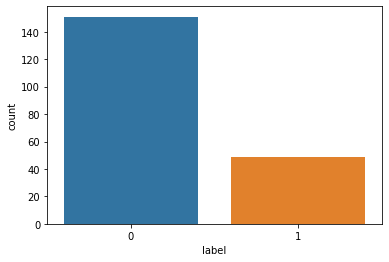

In [10]:
ax = sns.countplot(df_Snacks_XDeepFM['label'],label="Count")

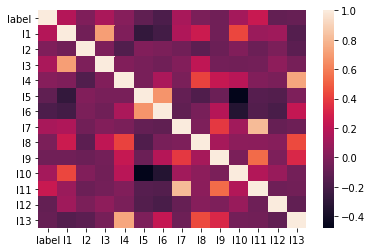

In [11]:
sns.heatmap(df_Snacks_XDeepFM.corr())

Text(0.5, 1.0, 'Model Cross Entropy')

Text(0, 0.5, 'Binary Cross Entropy')

Text(0.5, 0, 'epoch')

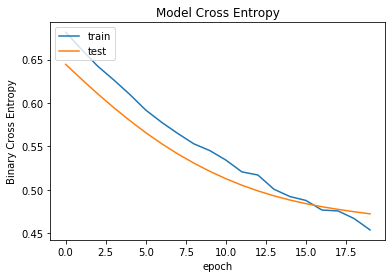

Text(0.5, 1.0, 'Model Loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'epoch')

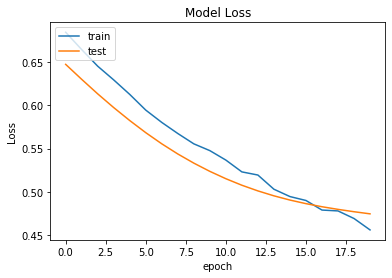

In [13]:

with open('train_history.txt') as f:
    train_history1 = json.load(f)
#train_history1

plt.plot(train_history1['binary_crossentropy'])
plt.plot(train_history1['val_binary_crossentropy'])
plt.title('Model Cross Entropy')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history1['loss'])
plt.plot(train_history1['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Knowledge Graph

<Figure size 864x864 with 0 Axes>

{'Q2657718': Text(-0.6324476485891184, -0.6684556789807701, 'Armenian Soviet Encyclopedia'),
 'Q27554871': Text(-0.692703079762594, -0.6526958802248899, 'GOST R 51865-2002 Macaroni products. General specifications'),
 'Q27554985': Text(-0.6697384737315137, -0.549686828831767, 'GOST 31743-2012 Macaroni products. General specifications'),
 'Q27496539': Text(-0.6736916778325764, -0.7022018756826738, 'flour product'),
 'Q46018558': Text(-0.60872578325643, -0.5325041641636731, 'groats, pastas and legumes'),
 'Q736427': Text(-0.37177180394193704, -0.5292066564888365, 'staple food'),
 'Q7493597': Text(-0.6386408498448111, -0.5901342342244379, 'shelf stable food'),
 'Q2095': Text(-0.36104791492365157, -0.557389206149243, 'food'),
 'Q148': Text(-0.6276489097425242, -0.7341095372555537, "People's Republic of China"),
 'Q38': Text(-0.4680888099676864, -0.7692696739687578, 'Italy'),
 'Q618324': Text(-0.6949590905357235, -0.603346384124562, 'Triticum durum'),
 'Q8964844': Text(-0.5748107312300421, 

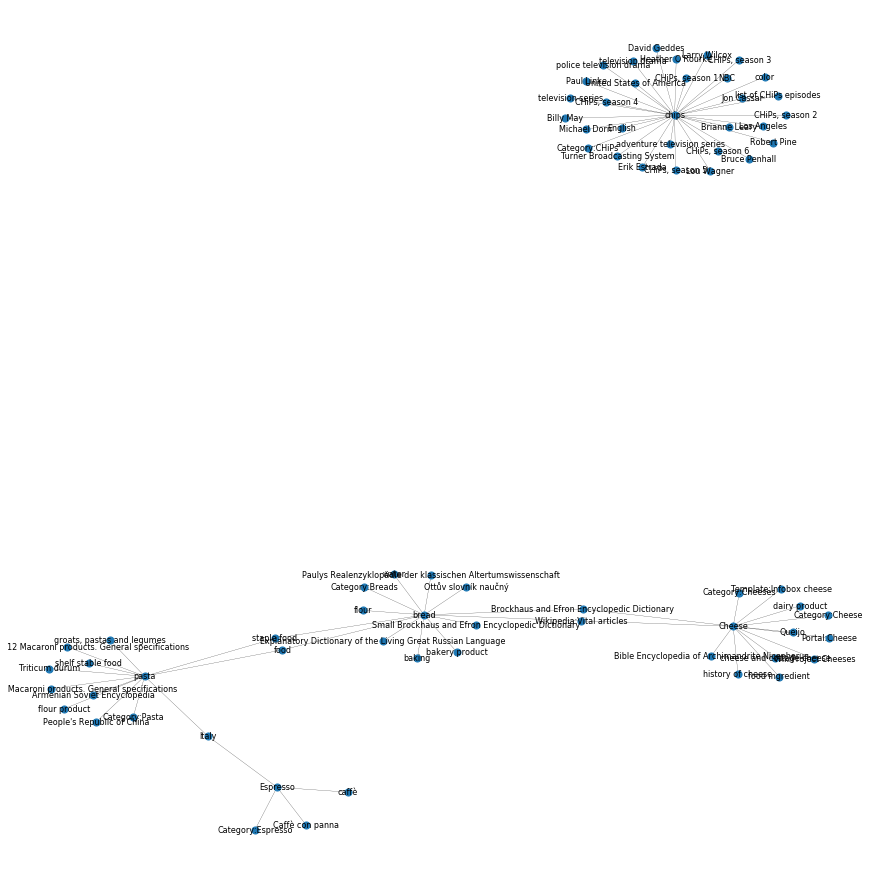

In [21]:
results_list = pd.read_csv('results_list.csv', index_col=[0])

G = nx.from_pandas_edgelist(results_list, 'original_entity', 'linked_entities')

target_names = results_list[["linked_entities", "name_linked_entities"]].drop_duplicates().rename(columns={"linked_entities": "labels", "name_linked_entities": "name"})
source_names = results_list[["original_entity", "name"]].drop_duplicates().rename(columns={"original_entity": "labels"})
names = pd.concat([target_names, source_names])
names = names.set_index("labels")
names = names.to_dict()["name"]

plt.figure(figsize=(12,12)) 
pos = nx.spring_layout(G)
nx.draw(G,pos, node_size=50,font_size=8, width = 0.2)
nx.draw_networkx_labels(G, pos, names, font_size=8)
plt.show()

## Customer2Vec

<Figure size 720x504 with 0 Axes>

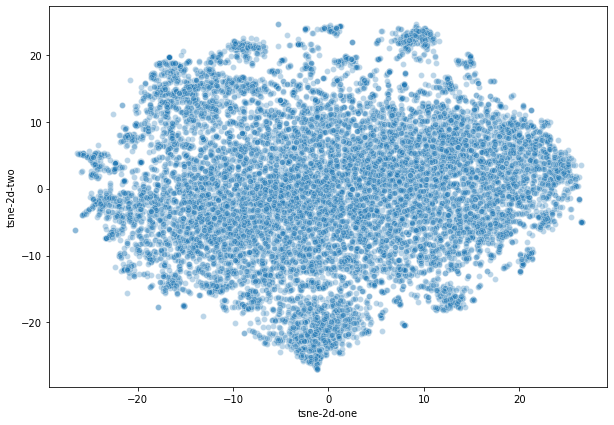

In [22]:

tsne_doc_features = pd.read_csv('tsne_doc_features.csv', index_col=[0])
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=tsne_doc_features,
    legend="full",
    alpha=0.3
)
plt.show()

<Figure size 720x576 with 0 Axes>

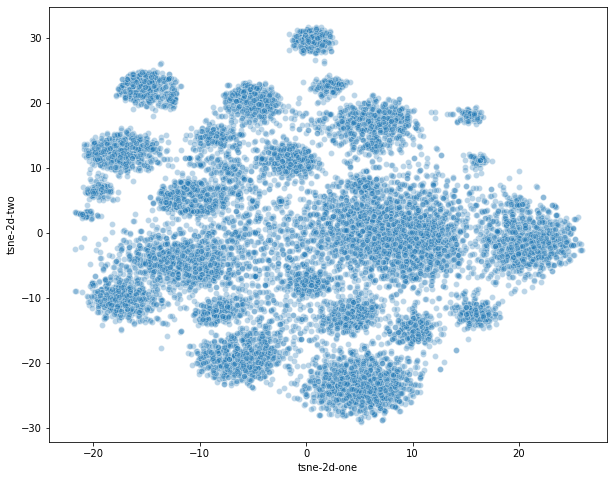

In [23]:
tsne_doc = pd.read_csv('tsne_doc.csv', index_col=[0])
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=tsne_doc,
    legend="full",
    alpha=0.3
)
plt.show()

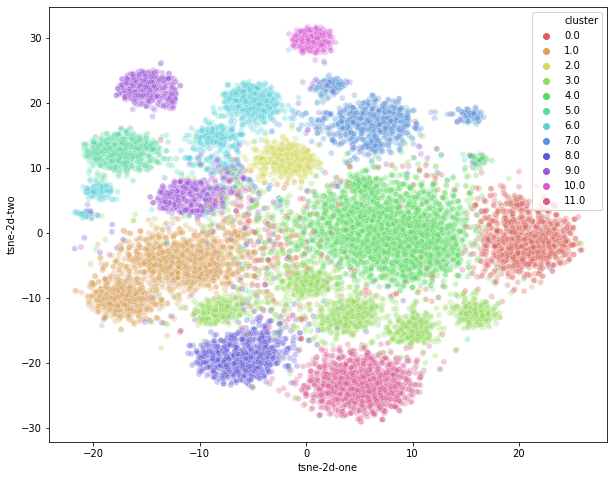

In [24]:

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='cluster',
    palette=sns.color_palette("hls", tsne_doc['cluster'].nunique()),
    data=tsne_doc,
    legend="full",
    alpha=0.3
);
plt.show();

In [26]:
feature_df = pd.read_csv('feature_df.csv', index_col=[0])
feature_df['latent_cluster'] = tsne_doc['cluster']

interpetation_aisle = feature_df.groupby('latent_cluster')[feature_df.columns.values[16:-1]].mean()
interpetation_aisle.T.div(interpetation_aisle.sum(axis=1)).round(3).head(20)

latent_cluster,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
pantry,0.035,0.047,0.039,0.035,0.039,0.046,0.044,0.035,0.042,0.040,0.031,0.037
personal care,0.011,0.011,0.016,0.008,0.009,0.009,0.013,0.008,0.012,0.012,0.011,0.011
pets,0.006,0.001,0.000,0.003,0.001,0.000,0.001,0.003,0.002,0.001,0.006,0.001
produce,0.200,0.190,0.178,0.196,0.206,0.210,0.198,0.187,0.188,0.195,0.223,0.204
snacks,0.061,0.064,0.070,0.064,0.065,0.061,0.064,0.073,0.054,0.063,0.059,0.065
Candy Club,0.014,0.013,0.008,0.014,0.012,0.016,0.008,0.010,0.011,0.011,0.010,0.011
FitSnack,0.001,0.001,0.001,0.001,0.000,0.002,0.001,0.001,0.001,0.001,0.001,0.001
KetoKrate,0.002,0.003,0.002,0.002,0.003,0.002,0.002,0.004,0.002,0.004,0.004,0.004
Love with food,0.002,0.002,0.002,0.001,0.001,0.002,0.001,0.001,0.002,0.001,0.002,0.002
MunchPak,0.004,0.004,0.005,0.005,0.004,0.005,0.002,0.007,0.006,0.005,0.003,0.004


In [27]:
# Save prior_orders_details 

prior_orders_details_clustered = pd.read_csv('prior_orders_detail.csv', index_col=[0])
for cluster_id in [0.0, 4.0]:  #Tune with slider range
    prior_orders_details_clustered[prior_orders_details_clustered['latent_cluster']==cluster_id][['user_id', 'product_name']].groupby("user_id").apply(lambda order: ' > '.join(order['product_name'])).reset_index().head(10)

,user_id,0
0,118,"Bag of Organic Bananas > Organic Granny Smith Apple > Organic Large Extra Fancy Fuji Apple > Organic Mango Acai Fruit Leather, 12 Ct > Peppered Turkey Jerky > Pure Madagascar Vanilla Extract > Aged Red Wine Vinegar > Berry Medley > Total 0% Nonfat Greek Yogurt > Unsweetened Coconut Milk Beverage > Total 2% Lowfat Plain Greek Yogurt > Healthy Grains Oats & Honey Clusters with Toasted Coconut Gluten Free > Bag of Organic Bananas > Organic Baby Carrots > Organic Large Extra Fancy Fuji Apple > P..."
1,140,"Shredded Parmesan > Enlightened Organic Raw Kombucha > Bag of Organic Bananas > Spicy Avocado Hummus > Organic Baby Rainbow Carrots > Vanilla Almond Breeze Almond Milk > Red Raspberries > Large Alfresco Eggs > Organic Kiwi > Kiwi Spinach Peas & Green Apple > Wholesome Breakfast Apple Raisin Baby Food > Wholesome Breakfast Blueberry Banana > Organic Strawberry Banana Fruit Yogurt Smoothie > Blueberry Beet & Brown Rice Cakes > Pretzel Sticks, Gluten Free > Hint Of Sea Salt Almond Nut Thins > G..."
2,313,Organic Tomato Cluster > Organic Cucumber > Organic Italian Parsley Bunch > Organic Red Onion > Organic Grape Tomatoes > Organic Red Cabbage > Carrots > Organic Zucchini > Organic Garbanzo Beans > Naturally Clean Soft Toothbrush > Primordial Himalayan Sea Salt > Organic Basil > Organic Lemon > Organic Sunday Bacon > Organic Brown Rice Pasta Spirals > Organic Tomato Cluster > Organic Spring Mix Salad > Organic Sunday Bacon > Organic Italian Salad > Organic Brown Rice > Organic Yellow Onion >...
3,495,Organic Strawberries > Banana > Organic Avocado > Organic Lacinato (Dinosaur) Kale > Dried Sweetened Cranberries > Ricotta And Spinach Tondi > Gluten Free Whole Grain Bread > Multi-Seed Original Crackers > Organic Whole Crimini Mushrooms > Mellow White Miso > Organic Baby Spinach > Gluten Free Millet-Chia Bread > Gluten Free Whole Grain Bread > Organic Original Almond Milk > Cream Top Smooth & Creamy Vanilla Yogurt > Organic Mushroom & Olive Pizza > Organic Whole String Cheese > Vanilla Nonf...
4,508,Organic Just Tart Cherry Juice > Organic Red Onion > Organic Just Tart Cherry Juice > Farmhouse Culture Classic Caraway Kraut > Organic Jalapeno Hot Sauce > Organic Original Coconut Non-Dairy Beverage > Organic Plain Kefir > European-Style Cultured Butter > Organic Small Curd Cottage Cheese > Parmesan Cheese Grated from the block > Baby Swiss Slices Cheese > Bag of Organic Bananas > Dried Cherry Montmorency Tart > Organic Medjool Dates > Organic Cucumber > Organic Ginger Juice > Roasted Dand...
5,1225,"Organic Raspberry Lowfat Yogurt > Organic Yellow Peaches > Organic Stone Ground Mustard > Organic Simply Stock Unsalted Chicken Stock > Avocado Roll > Organic Pinto Beans > Organic Black Beans > Organic Crushed Tomatoes > Chipotle Peppers in Adobo Sauce > Organic White Onions > Carrots > Organic Garlic > Organic Small Bunch Celery > Ranchero Queso Fresco Cheese > Cocoa Powder > Organic Unsweetened Almond Milk > Organic Orange Juice > Organic Milk Reduced Fat, 2% Milkfat > Organic Raspberry L..."
6,1527,Banana > 100% Whole Wheat Bread > Organic 90% Ground Beef > Organic Cucumber > Organic Gala Apples > Small Hass Avocado > Organic Strawberries > Organic Baby Spinach > Total 2% Lowfat Greek Strained Yogurt with Peach > Organic Raspberries > Organic Grade A Large Brown Eggs > Organic Mexican Blend Finely Shredded Cheese > Organic Small Bunch Celery > Organic YoKids Smoothie Strawberry Banana Lowfat Yogurt > Organic AppleApple > Cream Cheese Spread > Multi Grain Waffles > Chewy Granola Bar Cho...
7,1659,"Whole Ground Flaxseed Meal > Unsweetened Cocoa Powder > Organic Cilantro > Teriyaki Chick'n Strips > Cheese Alternative, American Style, Slices > Dairy Free Hazelnut Coconut Milk Creamer > Michigan Organic Kale > Organic Light Agave Nectar > High Omega Vegan Ranch Salad Dressing > Dairy Alternative Vegan Sour Cream > Organic Jalapeno Pepper > All Natural Original Guacamole Mix > Double Roasted Tomato Medium Salsa > Organic Garba

,user_id,0
0,26,Sparkling Water Grapefruit > Coconut Oil Popcorn > Unsweetened Blackberry Water > Pure Sparkling Water > Dark Choc. Rice Cakes > Popped Corn Just The Cheese Corn > Enlightened Organic Raw Kombucha > Organic Heavy Whipping Cream > Lager Beer > Sea Salt Flakes Original > Hummus > Bunny-Luv Fresh Organic Carrots > Organic Just Blueberries > Frozen Blueberries > Organic Creamy Peanut Butter Hint of Sea Salt > Kosher Whole Dill Pickles > White Unscented Facial Tissue > Organic Unsweetened Plain ...
1,38,Pure Sparkling Water > Organic Hass Avocado > Sparkling Lemon Water > Organic Seasoned Yukon Select Potatoes Hashed Browns > Cold Brew Coffee Double Espresso with Almond Milk > Organic Large Grade AA Brown Eggs > 2% Reduced Fat Milk > Sliced Black Olives > Original Cold Brew Coffee With Milk > Red Chile Enchilada Sauce > California Sourdough Bread > Organic Iceberg Lettuce > Organic American Cheese Singles > Intense Dark Chocolate with Sea Salt & Roasted Almonds > Chipotle Chicken Burrito >...
2,69,"Dairy Free Plain Cream Cheese Style Spread > Gluten Free Sliced Mountain White Bread > Mild Salsa Roja > Gluten Free Uncured Frozen Pepperoni Pizza > Gluten Free Honey Mustard & Onion Pretzel Sticks > Kitchen Cheese Enchilada > Original Pure Creamy Almond Milk > Organic Mint Tereré Yerba Mate Blend > Mango Flavor Probiotic Juice Drink > Gluten-Free Brown Rice Pasta > Original Coconut Milk Creamer > California Veggie Burgers - 4 CT > Dressing, Jersey Sweet Onion, Calorie Free > Fire Roasted C..."
3,151,Organic Unbleached All-Purpose Flour > Organic Whole Milk > Organic Raspberries > Organic Cilantro > Natural Sour Cream > Corn Tortillas > Organic Large Grade AA Brown Eggs > Organic Garlic > Tangerine Fruit Juice > Roasted Salted Peanuts > Organic Jalapeno Pepper > Traditional Scottish Style Smoked Salmon > Extra Virgin Olive Oil > Crushed Tomatoes > Organic Baby Kale Mix > Sweet Onion > Organic Diced Tomatoes > Uncured Diced Pancetta > Organic Apple Juice > Baba Ghannouge Eggplant Dip > Mi...
4,202,"Organic Red Lentils > Organic Cucumber > Organic Bunny Fruit Snacks Berry Patch > Kids Organic Chocolate Chip ZBars > Michigan Organic Kale > Organic Fudge Bars > Micro Brewed Cream Soda > California Sourdough Bread > Half & Half > Organic Milk Reduced Fat, 2% Milkfat > Organic Large Grade AA Brown Eggs > Organic Raspberry Lowfat Yogurt > Organic Garlic > Banana > Organic Classic Rich Crackers > Peanut Butter Cereal > Organic Milk Reduced Fat, 2% Milkfat > Organic Raspberry Lowfat Yogurt > B..."
5,304,"Whole Jersey Milk Low Pasteurized > Chocolate Protein Soy & Dairy Protein Shake > Organic Icelandic, Whole Milk, Vanilla Yogurt > Peanut Butter Bar > Chocolate Protein Soy & Dairy Protein Shake > Watermelon Chunks > Peanut Butter Bar > Organic Icelandic, Whole Milk, Vanilla Yogurt > Organic Stoneground Flakes Cocoa Clusters Cereal > Whole Jersey Milk Low Pasteurized > Chocolate Protein Soy & Dairy Protein Shake > Organic Icelandic, Whole Milk, Vanilla Yogurt > Cold-Pressed Organic Orange > C..."
6,323,"Concentrated Cold Brew Coffee > Carob Chip > Bag of Organic Bananas > Organic Yellow Peaches > Organic Hass Avocado > Organic Raspberries > Organic Blueberries > Gluten Free Dark Chocolate Chunk Chewy with a Crunch Granola Bars > Maple Pumpkin Seeds with Sea Salt Chewy with a Crunch Granola Bars > Mini Babybel White Cheddar Cheese > Organic Whole Milk > Organic Reduced Fat Milk > Total 0% Nonfat Greek Yogurt > YoKids Blueberry & Strawberry/Vanilla Yogurt > Yogurt, Strained Low-Fat, Coconut >..."
7,604,Lowfat Vanilla Yogurt > Total 2% Greek Strained Yogurt with Cherry 5.3 oz > Organic Yellow Peaches > Organic Nectarine > Bag of Organic Bananas > Organic Soba > Organic Hass Avocado > Bunched Cilantro > Organic Reduced Sodium Tamari > Organic Salted Individually Wrapped Quarters Butter > Cane Sugar > Organic Reduced Fat Milk > GOLEAN Crunch! Cereal > Organic Short Grain Brown Rice > Organic Apple Juice > Americone Dream® Ice Cream > D

In [28]:
# Save prior_orders_details 
snacks = ['Snakku', 'Love with food', 'Candy Club', 'Nature Box', 'ZenPop', 'World Sampler', 'FitSnack', 'Vegan Cuts',
                'MunchPak', 'KetoKrate']

prior_orders_details_snacks = prior_orders_details_clustered[prior_orders_details_clustered.product_name.isin(snacks)] 
for cluster_id in [2, 7]:  #Tune with slider range
    prior_orders_details_snacks[prior_orders_details_snacks['latent_cluster']==cluster_id][['user_id', 'product_name']].groupby("user_id").apply(lambda order: ' > '.join(order['product_name'])).reset_index().head(10)

,user_id,0
0,2771,ZenPop
1,5613,World Sampler > World Sampler > World Sampler > World Sampler > World Sampler > World Sampler > World Sampler > World Sampler > World Sampler > World Sampler > World Sampler > World Sampler > World Sampler
2,6453,ZenPop > ZenPop > ZenPop > ZenPop
3,11953,World Sampler > World Sampler
4,23434,World Sampler
5,27062,Nature Box
6,27596,ZenPop > ZenPop > ZenPop > ZenPop
7,32064,World Sampler > Snakku
8,33983,FitSnack
9,34673,ZenPop


,user_id,0
0,866,World Sampler > World Sampler > World Sampler
1,4544,World Sampler > World Sampler > World Sampler > World Sampler > World Sampler
2,10187,World Sampler > World Sampler > World Sampler > World Sampler > World Sampler > World Sampler > World Sampler
3,14501,KetoKrate
4,15187,World Sampler > World Sampler > World Sampler > World Sampler > World Sampler > World Sampler
5,16087,KetoKrate > KetoKrate > KetoKrate > Vegan Cuts > KetoKrate
6,17829,ZenPop > ZenPop > ZenPop
7,22457,Vegan Cuts
8,25464,ZenPop
9,26074,KetoKrate
